In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [4]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [5]:
df.shape

(3803, 23)

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3677, 23)

# first column : property type

In [9]:
df['property_type'].value_counts()

property_type
flat     2818
house     859
Name: count, dtype: int64

Text(0.5, 1.0, 'Property Type Distribution')

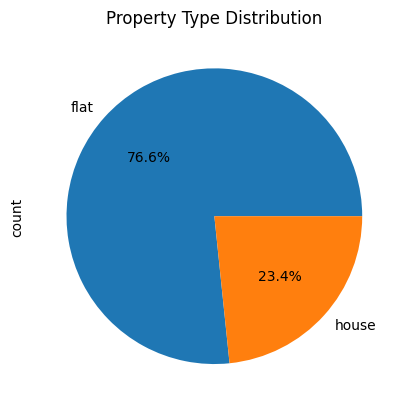

In [10]:
df['property_type'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%")
plt.title("Property Type Distribution")

In [11]:
# observations 
#1) no missing value 


# second column : society 

In [12]:
df['society'].value_counts().shape

(676,)

In [13]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [14]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [15]:
# top 10 societies

<Axes: xlabel='society'>

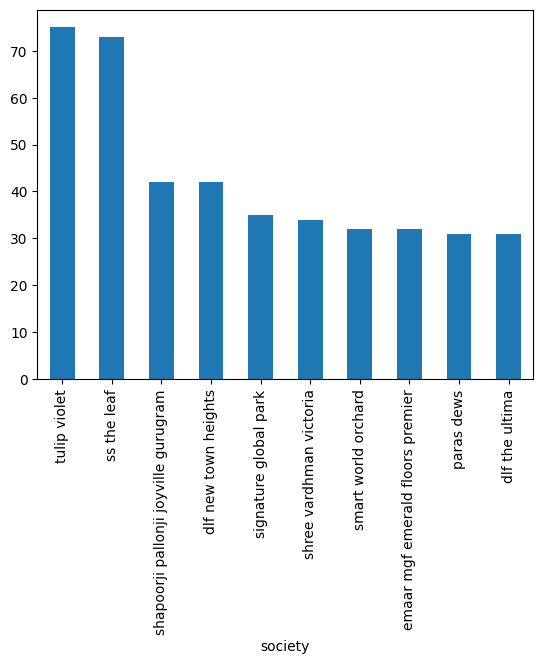

In [16]:
df[df['society']!= 'independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [17]:
df['society'].isnull().sum()

1

In [18]:
society_counts = df['society'].value_counts()
frequency_bins = {
    'very high (>100)': (society_counts>100).sum(),
    'high' : ((society_counts>50) & (society_counts<=100)).sum(),
    'average' : ((society_counts>10) & (society_counts<=50)).sum(),
    'low' : ((society_counts>1) & (society_counts<=10)).sum(),
    'only one' : (society_counts == 1).sum()
}

In [19]:
print(frequency_bins)

{'very high (>100)': 1, 'high': 2, 'average': 86, 'low': 279, 'only one': 308}


# sector

In [20]:
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

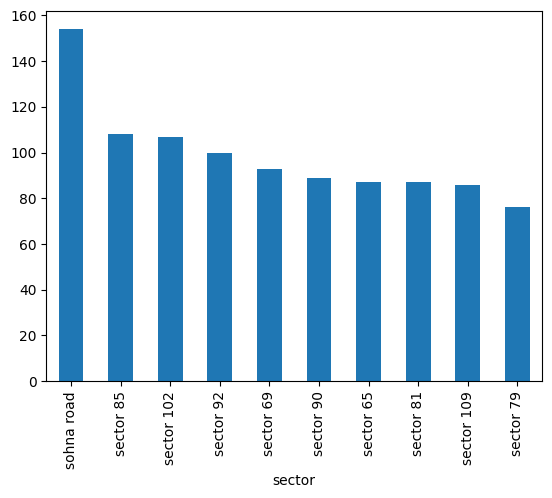

In [21]:
df['sector'].value_counts().head(10).plot(kind = 'bar')

In [22]:
sector_counts = df['sector'].value_counts()
frequency_bins = {
    'very high (>100)': (sector_counts>100).sum(),
    'high' : ((sector_counts>50) & (sector_counts<=100)).sum(),
    'average' : ((sector_counts>10) & (sector_counts<=50)).sum(),
    'low' : ((sector_counts>1) & (sector_counts<=10)).sum(),
    'only one' : (sector_counts == 1).sum()
}

In [23]:
frequency_bins

{'very high (>100)': 3, 'high': 23, 'average': 62, 'low': 24, 'only one': 1}

# price

In [24]:
df['price'].isnull().sum()

17

In [25]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

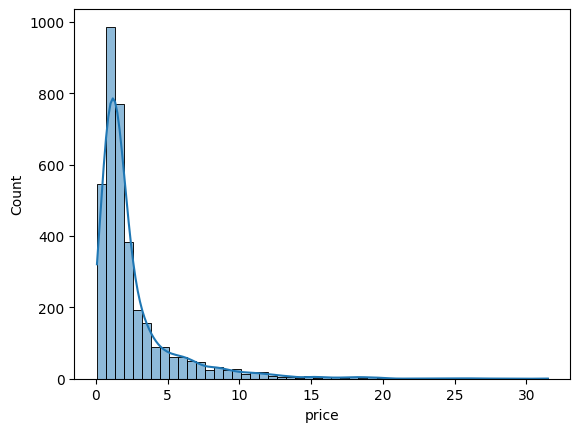

In [26]:
sns.histplot(df['price'], kde = True, bins = 50)

<Axes: xlabel='price'>

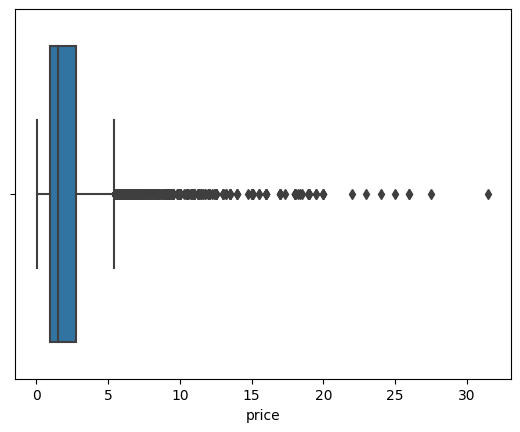

In [27]:
sns.boxplot(x = df['price'])

In [28]:
skewness = df['price'].skew() 
print(f"skewness : {round(skewness,2)}")

kurtosis = df['price'].kurt() 
print(f"kurtosis : {round(kurtosis,2)}")

skewness : 3.28
kurtosis : 14.93


In [29]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

iqr = q3-q1 
iqr

1.8

In [30]:
lower = q1 - 1.5*iqr 
upper = q3 + 1.5*iqr 

In [31]:
outliers = df[(df['price']<lower) | (df['price']>upper)]
outliers.shape

(425, 23)

In [32]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


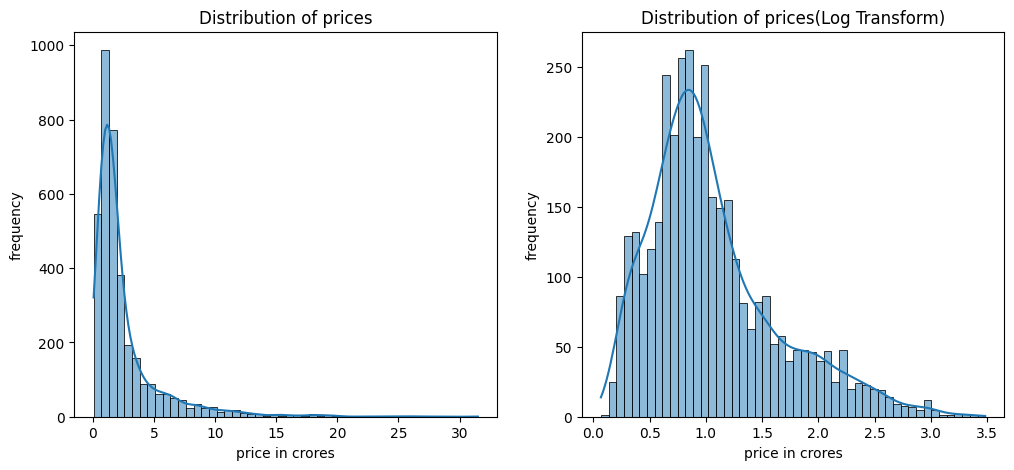

In [33]:
# since our data is right skewed 

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['price'],kde = True, bins = 50)
plt.xlabel("price in crores")
plt.ylabel('frequency')
plt.title("Distribution of prices")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde = True, bins = 50)
plt.xlabel("price in crores")
plt.ylabel('frequency')
plt.title("Distribution of prices(Log Transform)")


plt.show()

In [34]:
np.log1p(df['price']).skew(), np.log1p(df['price']).kurtosis()

(1.0740709565255315, 0.9646692415449296)

# price_per_sqft

In [35]:
df['price_per_sqft'].isnull().sum()

17

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


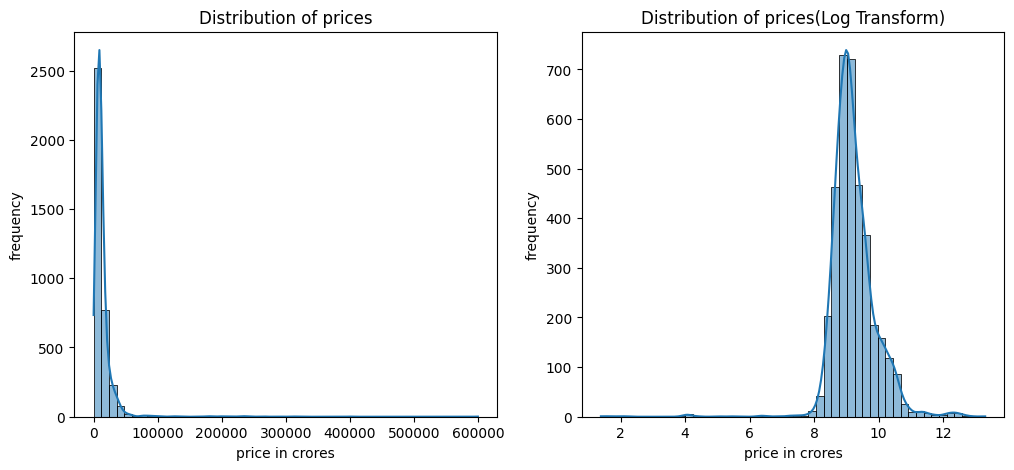

In [36]:
# since our data is right skewed 

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['price_per_sqft'],kde = True, bins = 50)
plt.xlabel("price in crores")
plt.ylabel('frequency')
plt.title("Distribution of prices")

plt.subplot(1,2,2)
sns.histplot(np.log(df['price_per_sqft']),kde = True, bins = 50)
plt.xlabel("price in crores")
plt.ylabel('frequency')
plt.title("Distribution of prices(Log Transform)")


plt.show()

In [37]:
np.log1p(df['price_per_sqft']).skew(), np.log1p(df['price_per_sqft']).kurtosis()

(-0.9498014147399654, 18.514869384549552)

# bedroom


In [38]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

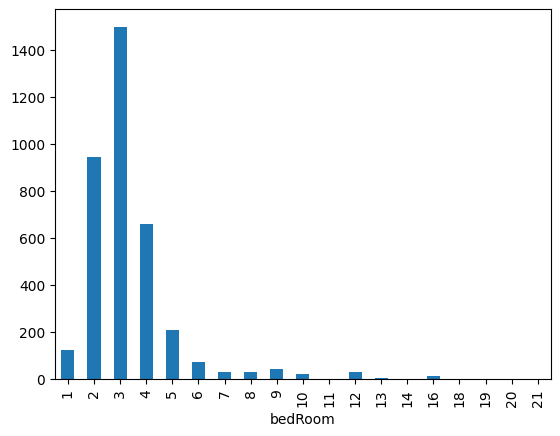

In [39]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')

# bathroom

In [40]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

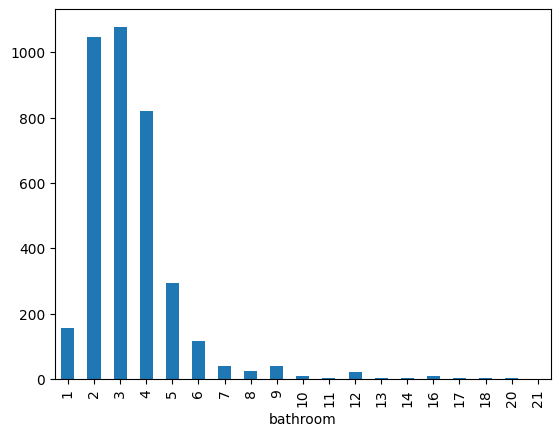

In [41]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')

In [42]:
df['bathroom'].value_counts()

bathroom
3     1077
2     1047
4      820
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
11       4
18       4
13       4
17       3
20       3
14       2
21       1
Name: count, dtype: int64

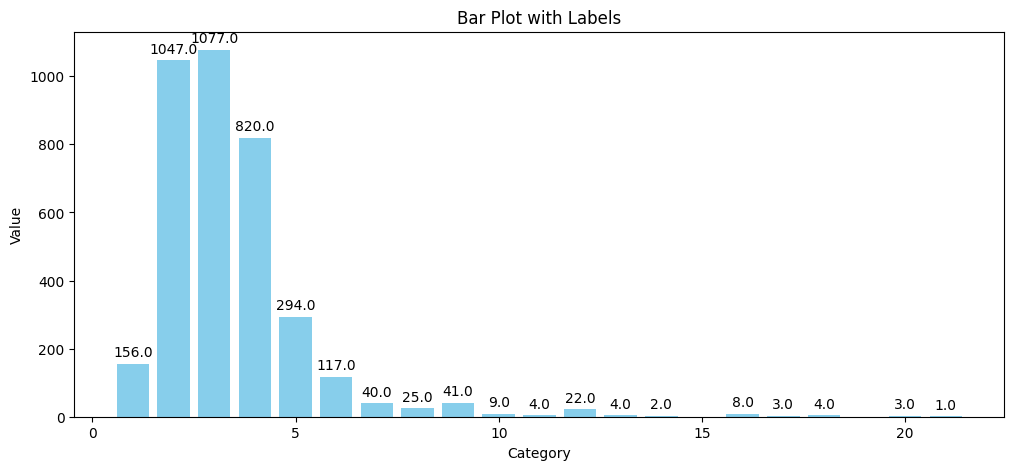

In [43]:
import matplotlib.pyplot as plt

# Sample Data
categories = sorted(list(df['bathroom'].unique()))
values = df['bathroom'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(categories, values, color="skyblue")

# Automatically label bars
ax.bar_label(bars, fmt="%.1f", fontsize=10, padding=3)

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Bar Plot with Labels")

plt.show()


# balcony

In [44]:
df['balcony'].isnull().sum()

0

In [45]:
arr = [1,10,2,3,8,4]
sorted(arr)

[1, 2, 3, 4, 8, 10]

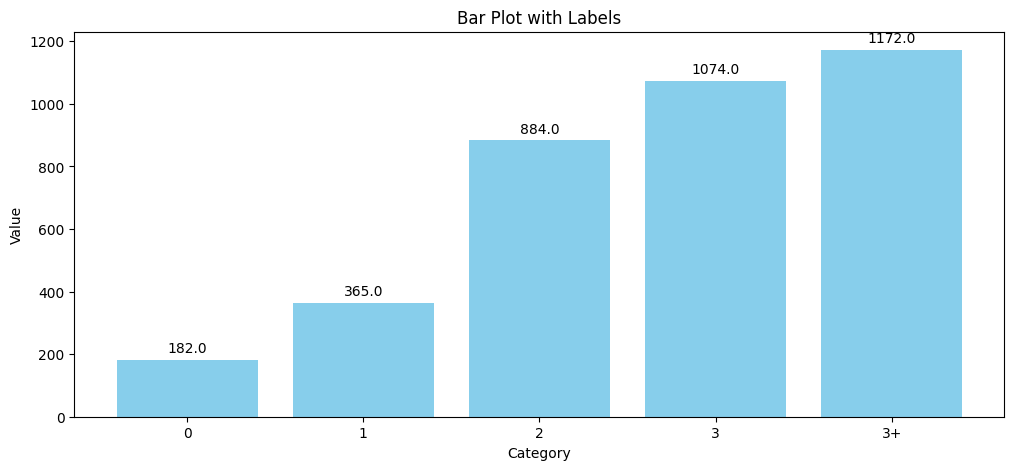

In [46]:
import matplotlib.pyplot as plt

# Sample Data
categories = sorted(list(df['balcony'].unique()))
values = df['balcony'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(categories, values, color="skyblue")

# Automatically label bars
ax.bar_label(bars, fmt="%.1f", fontsize=10, padding=3)

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Bar Plot with Labels")

plt.show()


# floor num

In [47]:
df['floorNum'].isnull().sum()

19

In [48]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [49]:
df['floorNum'].value_counts()

floorNum
3.0     498
2.0     493
1.0     351
4.0     316
8.0     195
6.0     183
10.0    179
7.0     176
5.0     169
9.0     161
12.0    158
0.0     129
11.0    113
14.0    112
15.0     80
16.0     52
17.0     46
13.0     42
18.0     36
19.0     33
20.0     26
21.0     16
23.0     14
22.0     13
24.0     11
25.0      9
27.0      8
26.0      5
30.0      5
33.0      4
28.0      4
29.0      3
31.0      3
32.0      2
43.0      2
34.0      2
39.0      2
35.0      2
44.0      1
45.0      1
51.0      1
38.0      1
40.0      1
Name: count, dtype: int64

<Axes: >

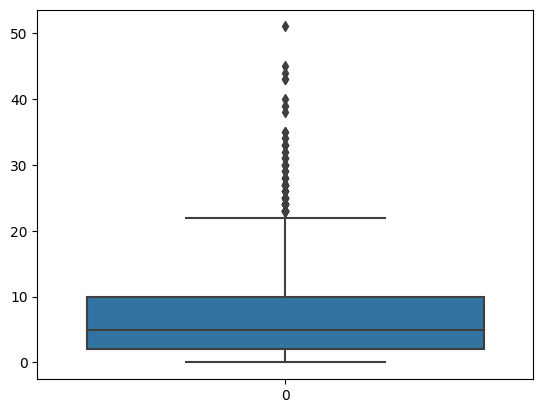

In [50]:
sns.boxplot(df['floorNum'])

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='floorNum', ylabel='Count'>

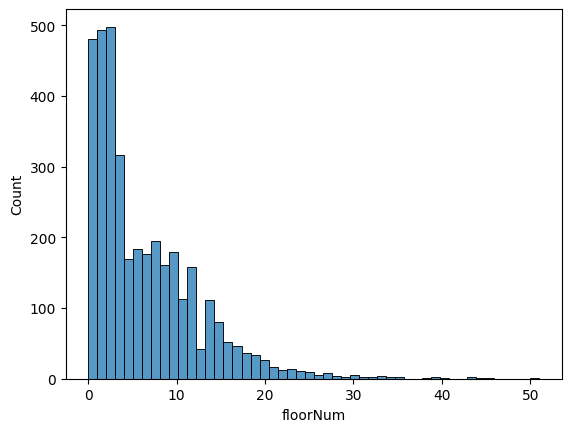

In [51]:
sns.histplot(df['floorNum'])

# facing

In [52]:
df['facing'].isnull().sum()

1045

In [53]:
df['facing'].value_counts()

facing
North-East    623
East          623
North         387
West          249
South         231
North-West    193
South-East    173
South-West    153
Name: count, dtype: int64

<Axes: xlabel='facing'>

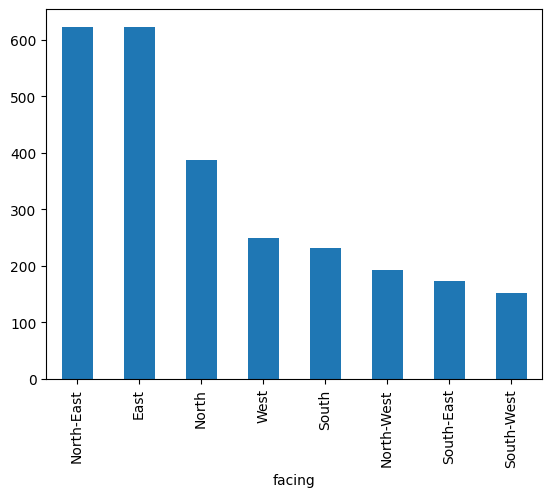

In [54]:
df['facing'].value_counts().plot(kind = 'bar')

# agepossesion

In [55]:
df['agePossession'].isnull().sum()

0

In [56]:
df['agePossession'].value_counts().sort_index()

agePossession
Moderately Old         563
New Property           593
Old Property           303
Relatively New        1646
Undefined              306
Under Construction     266
Name: count, dtype: int64

In [57]:
sorted(df['agePossession'].unique())

['Moderately Old',
 'New Property',
 'Old Property',
 'Relatively New',
 'Undefined',
 'Under Construction']

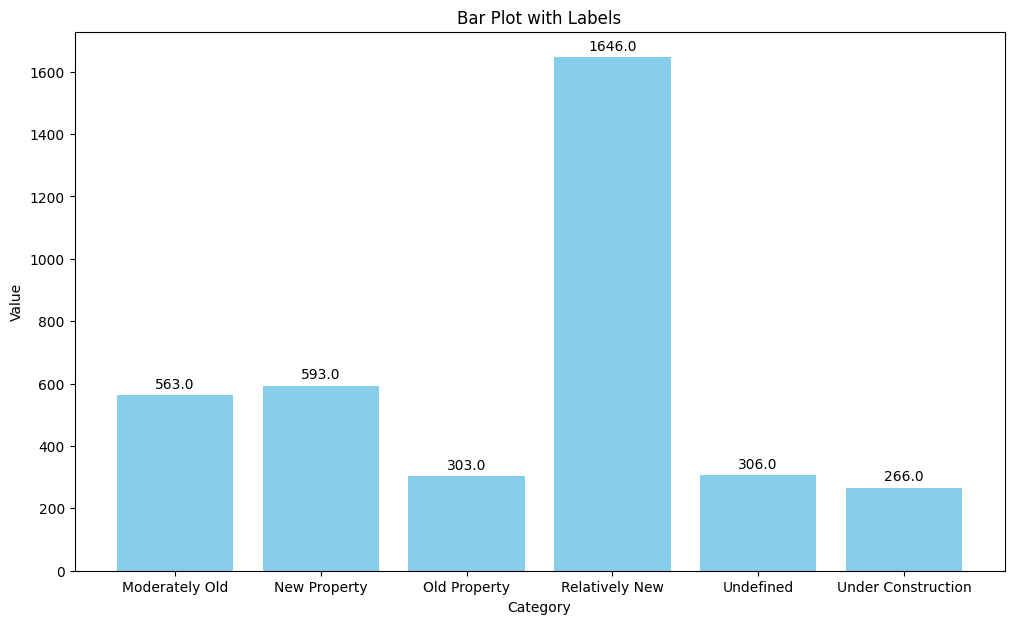

In [58]:
import matplotlib.pyplot as plt

# Sample Data
categories = sorted(list(df['agePossession'].unique()))
values = df['agePossession'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(categories, values, color="skyblue")

# Automatically label bars
ax.bar_label(bars, fmt="%.1f", fontsize=10, padding=3)

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Bar Plot with Labels")

plt.show()


# areas

In [59]:
df['super_built_up_area'].isnull().sum()

1802

In [60]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Count'>

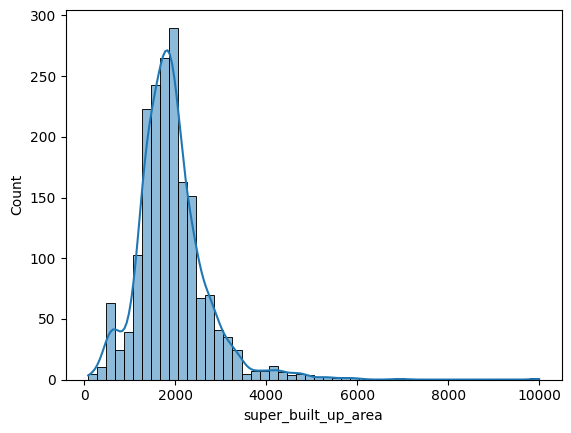

In [62]:
sns.histplot(df['super_built_up_area'].dropna(), bins = 50, kde =True)

<Axes: >

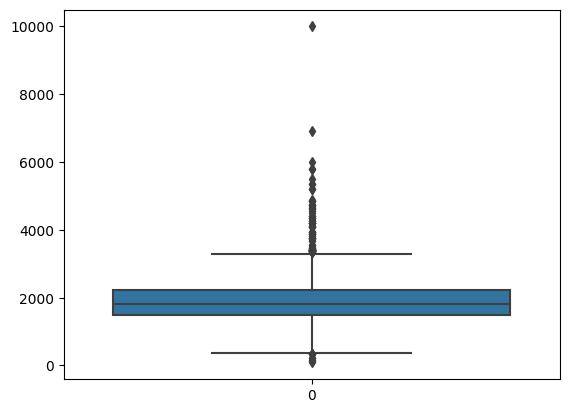

In [64]:
sns.boxplot(df['super_built_up_area'].dropna())

# built up area

In [65]:
df['built_up_area'].isnull().sum()

1987

In [66]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Count'>

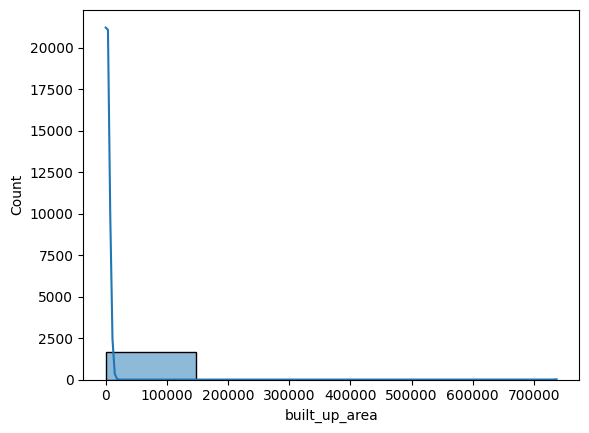

In [71]:
sns.histplot(df['built_up_area'].dropna(), bins = 5, kde =True)

<Axes: >

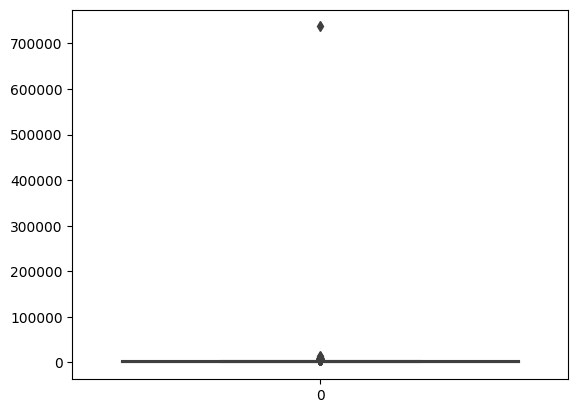

In [75]:
sns.boxplot(df['built_up_area'])

# carpet area

In [76]:
df['carpet_area'].isnull().sum()

1805

In [77]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

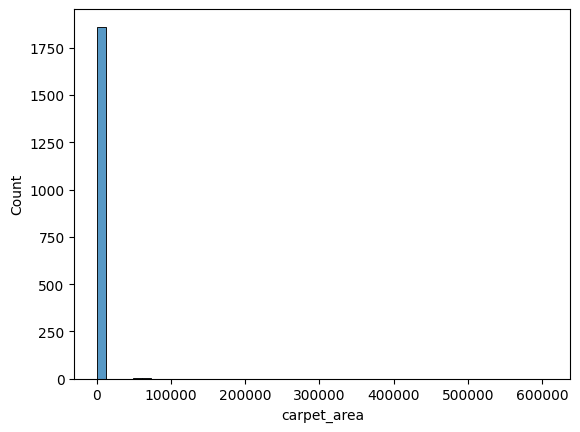

In [79]:
sns.histplot(df['carpet_area'].dropna(), bins = 50)

<Axes: >

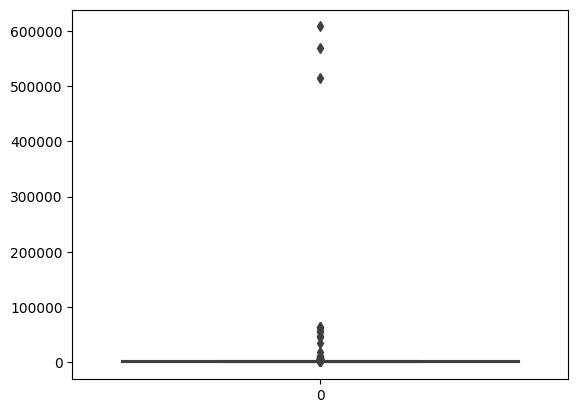

In [83]:
sns.boxplot(df['carpet_area'].dropna())

In [85]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,1,8
1,1,1,0,0,0,1,38
2,0,0,0,0,0,1,15
3,0,0,0,0,0,1,49
4,0,1,0,0,1,2,174
...,...,...,...,...,...,...,...
3798,0,0,0,0,0,1,73
3799,1,1,1,1,0,1,160
3800,0,0,0,0,0,2,67
3801,1,1,1,1,0,1,76


In [90]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

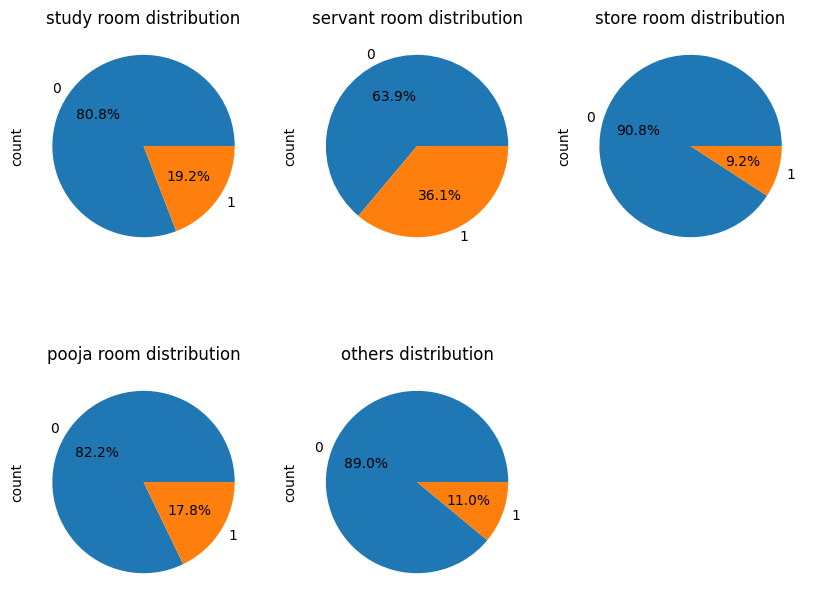

In [102]:
plt.figure(figsize=(10,8))
for idx, name in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others']):
    ax = plt.subplot(2,3,idx+1)
    df[name].value_counts().plot(kind = 'pie', autopct = "%1.1f%%",ax = ax)
    plt.title(f"{name} distribution")

# furnishing type

In [109]:
df['furnishing_type'].value_counts()

furnishing_type
1    2436
2    1038
0     203
Name: count, dtype: int64

Text(0.5, 1.0, 'furnishing type distribution')

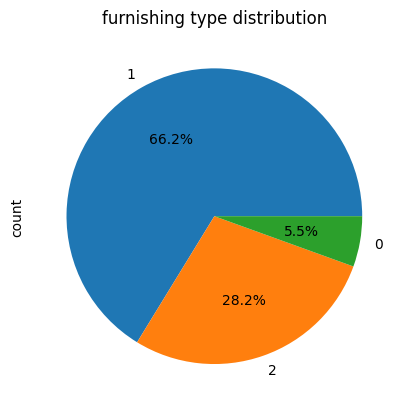

In [108]:
df['furnishing_type'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%")
plt.title(f"furnishing type distribution")

In [111]:
df['luxury_score'].isnull().sum()

0

In [112]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Count'>

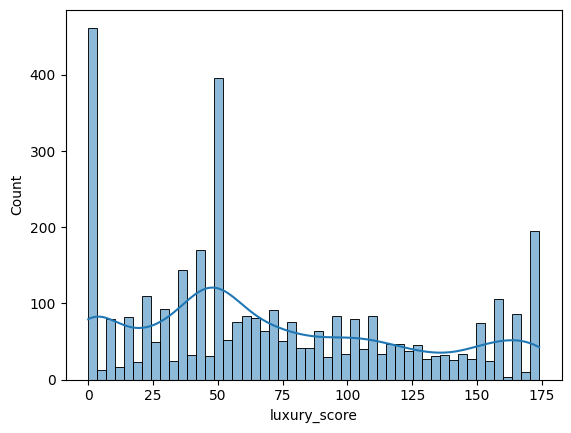

In [116]:
sns.histplot(df['luxury_score'], bins = 50, kde = True)